In [1]:
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
%matplotlib inline

# City of Chicago Crime Data 2001 to Present 
## Domestic Violence Incidents by Day, Year, Month and Day of the Week

### Step 1: Read in Dataset from City of Chicago Data Portal

In [2]:
data = pd.read_csv("/Users/sachinkelkar/desktop/ds-sf-29/data/Crimes_-_2001_to_present.csv")
data.head()

,Date,Domestic,Year
0,03/21/2006 07:40:00 AM,True,2006
1,03/22/2006 11:42:00 AM,True,2006
2,03/21/2006 06:00:00 PM,True,2006
3,03/20/2006 07:00:00 PM,True,2006
4,03/19/2006 07:00:00 PM,True,2006


### Step 2: Obtain index range and column names and verify if the dataset contains any null values.

In [3]:
pd.isnull(data).sum()

Date        0
Domestic    0
Year        0
dtype: int64

In [4]:
data.shape

(803355, 3)

In [5]:
data.index 

RangeIndex(start=0, stop=803355, step=1)

In [6]:
data.columns.tolist()

['Date', 'Domestic', 'Year']

### Step 3: Format dates: Drop time from "Date" and transform "Date" column into datetimeindex.  Delete "Year" column

In [7]:
data['Date'] = pd.to_datetime(data['Date']).dt.date

In [8]:
data.head()

,Date,Domestic,Year
0,2006-03-21,True,2006
1,2006-03-22,True,2006
2,2006-03-21,True,2006
3,2006-03-20,True,2006
4,2006-03-19,True,2006


In [9]:
del data['Year']

In [10]:
data['Date'] = pd.to_datetime(data.Date)

In [67]:
data.dtypes

Date           datetime64[ns]
Domestic                int64
day_of_week            object
Month                   int64
Year                    int64
Day                     int64
dtype: object

### Step 4: Create "Day of Week", "Month" and "Year" Columns as datetime

In [68]:
data['day_of_week'] = data['Date'].dt.weekday_name

In [69]:
data['Month'] = data['Date'].dt.month

In [70]:
data['Year'] = data['Date'].dt.year

In [71]:
data['Day'] = data['Date'].dt.day

In [72]:
data.Domestic = data.Domestic.astype(int)

In [73]:
data.head()

,Date,Domestic,day_of_week,Month,Year,Day
0,2006-03-21,1,Tuesday,3,2006,21
1,2006-03-22,1,Wednesday,3,2006,22
2,2006-03-21,1,Tuesday,3,2006,21
3,2006-03-20,1,Monday,3,2006,20
4,2006-03-19,1,Sunday,3,2006,19


### Step 5: Create Train Set by setting aside 2014 and 2015 data.  Obatin shape.

#### There are 679125 observations in the Train dataset.

In [74]:
train = (data['Date'] >= '2001-01-01') & (data['Date'] <= '2013-12-31')

In [75]:
ts = data.loc[train]

In [76]:
ts.head()

,Date,Domestic,day_of_week,Month,Year,Day
0,2006-03-21,1,Tuesday,3,2006,21
1,2006-03-22,1,Wednesday,3,2006,22
2,2006-03-21,1,Tuesday,3,2006,21
3,2006-03-20,1,Monday,3,2006,20
4,2006-03-19,1,Sunday,3,2006,19


In [77]:
ts.shape

(679125, 6)

In [78]:
ts.dtypes

Date           datetime64[ns]
Domestic                int64
day_of_week            object
Month                   int64
Year                    int64
Day                     int64
dtype: object

In [79]:
ts.dtypes

Date           datetime64[ns]
Domestic                int64
day_of_week            object
Month                   int64
Year                    int64
Day                     int64
dtype: object

### Step 6: Crosstab Day of Week and Year - Describe, Visualize
#### Saturday and Sunday have above average number of incidents compared to other days of the week, in all 14 years.

In [65]:
DoWYear = pd.crosstab(ts['day_of_week'], ts['Year'], rownames=['day_of_week'], margins=True)
DoWYear

Year,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,All
day_of_week,,,,,,,,,,,,,,
Friday,7991,8524,7300,7746,6985,6986,6890,7046,7341,7435,6883,6577,6120,93824
Monday,8301,8371,7350,7373,7148,7000,7165,6673,7284,7076,6874,6760,6135,93510
Saturday,9735,9939,8856,8663,8395,8282,8254,8403,8345,7974,8201,7541,7145,109733
Sunday,9728,10054,8975,9118,8637,8918,8699,8550,8758,8528,8263,8294,7648,114170
Thursday,7517,7982,6919,7408,6401,6622,6573,6548,7163,6906,6379,6298,5869,88585
Tuesday,7691,8331,7163,7046,6595,6731,6609,6711,7011,7015,6598,6535,5999,90035
Wednesday,7723,7985,7257,7107,6561,6762,6735,6517,7045,6869,6267,6517,5923,89268
All,58686,61186,53820,54461,50722,51301,50925,50448,52947,51803,49465,48522,44839,679125


In [66]:
DoWYear.describe()

Year,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,All
count,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000
mean,14671.500000,15296.500000,13455.000000,13615.250000,12680.500000,12825.250000,12731.250000,12612.000000,13236.750000,12950.750000,12366.250000,12130.500000,11209.750000,169781.250000
std,17806.466273,18560.096451,16328.910558,16520.902031,15394.025335,15568.762835,15452.839265,15310.003359,16058.267321,15709.515258,15009.781485,14719.502156,13603.668652,206034.305518
min,7517.000000,7982.000000,6919.000000,7046.000000,6401.000000,6622.000000,6573.000000,6517.000000,7011.000000,6869.000000,6267.000000,6298.000000,5869.000000,88585.000000
25%,7715.000000,8244.500000,7233.500000,7306.500000,6586.500000,6754.250000,6703.500000,6641.750000,7133.500000,6987.750000,6543.250000,6530.500000,5980.000000,89843.250000
50%,8146.000000,8447.500000,7325.000000,7577.000000,7066.500000,6993.000000,7027.500000,6878.500000,7312.500000,7255.500000,6878.500000,6668.500000,6127.500000,93667.000000
75%,9729.750000,9967.750000,8885.750000,8776.750000,8455.500000,8441.000000,8365.250000,8439.750000,8448.250000,8112.500000,8216.500000,7729.250000,7270.750000,110842.250000
max,58686.000000,61186.000000,53820.000000,54461.000000,50722.000000,51301.000000,50925.000000,50448.000000,52947.000000,51803.000000,49465.000000,48522.000000,44839.000000,679125.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x115373908>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x11e81c6a0>]], dtype=object)

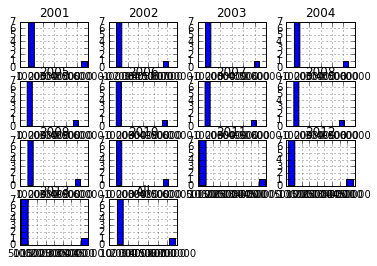

In [60]:
DoWYear.hist()

### Step 7: Crosstab Date and Domestic - Describe, Visualize
#### Mean number of incidents per day = 143.03.  Standard deviation is 29.78.  New Years Day appears twelve times in the days with the most incidents with a range of 251-343, greater than two standard deviations higher than mean.

In [26]:
Day = pd.crosstab(ts['Date'], ts['Domestic'], rownames=['Date'])
Day.head()

Domestic,1
Date,
2001-01-01,281
2001-01-02,146
2001-01-03,162
2001-01-04,131
2001-01-05,159


In [27]:
Day.describe()

Domestic,1
count,4748.000000
mean,143.033909
std,29.786275
min,68.000000
25%,122.000000
50%,140.000000
75%,160.250000
max,343.000000


In [28]:
DayCount = ts.groupby('Date').count()
DayCount.nlargest(30, "Domestic")

,Domestic,day_of_week,Month,Year,Day
Date,,,,,
2004-01-01,343,343,343,343,343
2002-06-01,316,316,316,316,316
2003-01-01,312,312,312,312,312
2005-01-01,310,310,310,310,310
2009-01-01,304,304,304,304,304
2002-01-01,286,286,286,286,286
2001-01-01,281,281,281,281,281
2006-01-01,277,277,277,277,277
2007-06-17,276,276,276,276,276


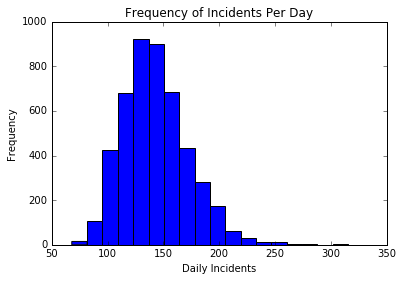

In [29]:
DayCount.Domestic.plot(kind='hist', bins=20, title='Frequency of Incidents Per Day')
plt.xlabel('Daily Incidents')
plt.ylabel('Frequency')

/Users/sachinkelkar/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:1: FutureWarning: 
The default value for 'return_type' will change to 'axes' in a future release.
 To use the future behavior now, set return_type='axes'.
 To keep the previous behavior and silence this warning, set return_type='dict'.
  if __name__ == '__main__':


{'boxes': [<matplotlib.lines.Line2D at 0x11a7f3048>],
 'caps': [<matplotlib.lines.Line2D at 0x11a7f99b0>,
 'fliers': [<matplotlib.lines.Line2D at 0x11a7feb38>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x11a7fe320>],
 'whiskers': [<matplotlib.lines.Line2D at 0x11a7ebd68>,
  <matplotlib.lines.Line2D at 0x11a7f3a58>]}

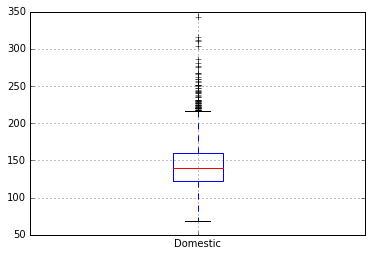

In [30]:
DayCount.boxplot(['Domestic'])

### Step 8:  Group by Day of the Week for entire DataSet - Describe and Vizualize
#### Just as Saturday and Sunday had tye hughest average number of incidents each year, they have the highest number across the entire dataset.

In [31]:
DoWCount = ts.groupby('day_of_week').count()

In [32]:
DoWCount.describe()

,Date,Domestic,Month,Year,Day
count,7.000000,7.000000,7.000000,7.000000,7.000000
mean,97017.857143,97017.857143,97017.857143,97017.857143,97017.857143
std,10474.654385,10474.654385,10474.654385,10474.654385,10474.654385
min,88585.000000,88585.000000,88585.000000,88585.000000,88585.000000
25%,89651.500000,89651.500000,89651.500000,89651.500000,89651.500000
50%,93510.000000,93510.000000,93510.000000,93510.000000,93510.000000
75%,101778.500000,101778.500000,101778.500000,101778.500000,101778.500000
max,114170.000000,114170.000000,114170.000000,114170.000000,114170.000000


In [33]:
DoWCount.nlargest(7, "Domestic")

,Date,Domestic,Month,Year,Day
day_of_week,,,,,
Sunday,114170,114170,114170,114170,114170
Saturday,109733,109733,109733,109733,109733
Friday,93824,93824,93824,93824,93824
Monday,93510,93510,93510,93510,93510
Tuesday,90035,90035,90035,90035,90035
Wednesday,89268,89268,89268,89268,89268
Thursday,88585,88585,88585,88585,88585


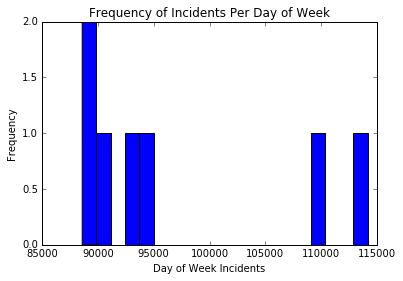

In [34]:
DoWCount.Domestic.plot(kind='hist', bins=20, title='Frequency of Incidents Per Day of Week')
plt.xlabel('Day of Week Incidents')
plt.ylabel('Frequency')

### Step 9: Crosstab Month and Year and Group by Month 

In [35]:
MY = pd.crosstab(ts['Month'], ts['Year'], rownames=['Month'], margins=True)
MY

Year,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,All
Month,,,,,,,,,,,,,,
1,4710,4637,4224,4222,3959,4073,3845,3905,4075,3838,3788,3753,3541,52570
2,4242,4083,3607,4301,3740,3650,3550,3559,3698,3518,3248,3468,3094,47758
3,5078,5114,4521,4898,4099,4061,4365,4196,4477,4640,4157,4330,3879,57815
4,5145,5133,4784,4733,4583,4502,4367,4203,4367,4549,4425,4000,3954,58745
5,5412,5907,4769,5173,4981,4720,4808,4500,5043,4896,4572,4574,4166,63521
6,5709,6062,4823,4812,4884,4663,4829,4632,4941,4863,4645,4671,4277,63811
7,5340,6061,5262,4992,4862,5107,4797,4888,4781,4994,4883,4811,4208,64986
8,5130,5348,5176,4724,4417,4617,4593,4723,4911,4689,4287,4305,4055,60975
9,4757,4932,4466,4559,4111,4191,4363,4378,4469,4215,3897,3867,3774,55979


In [36]:
MY.describe()

Year,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,All
count,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.00000,13.000000,13.000000,13.000000
mean,9028.615385,9413.230769,8280.000000,8378.615385,7803.384615,7892.461538,7834.615385,7761.230769,8145.692308,7969.692308,7610.00000,7464.923077,6898.307692,104480.769231
std,14927.257671,15568.113058,13691.674094,13852.048727,12905.106441,13049.500454,12955.214333,12832.767733,13467.589381,13179.951709,12583.66157,12344.640817,11406.861892,172754.475864
min,4242.000000,4083.000000,3607.000000,3825.000000,3437.000000,3650.000000,3533.000000,3490.000000,3698.000000,3518.000000,3248.00000,3468.000000,3094.000000,47758.000000
25%,4406.000000,4690.000000,4224.000000,4301.000000,3959.000000,4061.000000,3845.000000,3940.000000,4100.000000,3844.000000,3825.00000,3682.000000,3433.000000,52570.000000
50%,5078.000000,5114.000000,4521.000000,4724.000000,4111.000000,4191.000000,4365.000000,4203.000000,4469.000000,4549.000000,4157.00000,4000.000000,3879.000000,57815.000000
75%,5340.000000,5907.000000,4823.000000,4898.000000,4862.000000,4663.000000,4797.000000,4632.000000,4911.000000,4863.000000,4572.00000,4574.000000,4166.000000,63521.000000
max,58686.000000,61186.000000,53820.000000,54461.000000,50722.000000,51301.000000,50925.000000,50448.000000,52947.000000,51803.000000,49465.00000,48522.000000,44839.000000,679125.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11aa51be0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x1209d1940>]], dtype=object)

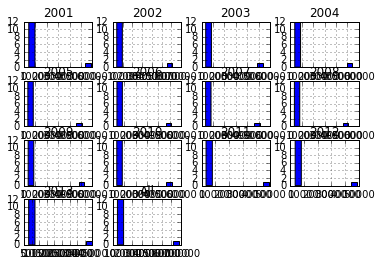

In [37]:
MY.hist()

In [38]:
MonthCount = ts.groupby('Month').count()

In [39]:
MonthCount.describe()

,Date,Domestic,day_of_week,Year,Day
count,12.00000,12.00000,12.00000,12.00000,12.00000
mean,56593.75000,56593.75000,56593.75000,56593.75000,56593.75000
std,5994.81508,5994.81508,5994.81508,5994.81508,5994.81508
min,47758.00000,47758.00000,47758.00000,47758.00000,47758.00000
25%,51893.50000,51893.50000,51893.50000,51893.50000,51893.50000
50%,56897.00000,56897.00000,56897.00000,56897.00000,56897.00000
75%,61611.50000,61611.50000,61611.50000,61611.50000,61611.50000
max,64986.00000,64986.00000,64986.00000,64986.00000,64986.00000


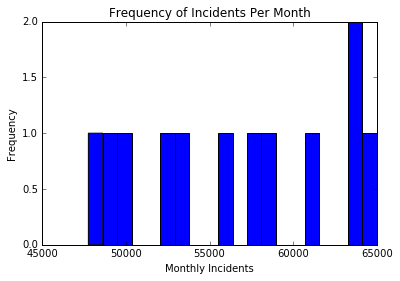

In [40]:
MonthCount.Domestic.plot(kind='hist', bins=20, title='Frequency of Incidents Per Month')
plt.xlabel('Monthly Incidents')
plt.ylabel('Frequency')

In [41]:
MonthCount.nlargest(12, "Domestic")

,Date,Domestic,day_of_week,Year,Day
Month,,,,,
7,64986,64986,64986,64986,64986
6,63811,63811,63811,63811,63811
5,63521,63521,63521,63521,63521
8,60975,60975,60975,60975,60975
4,58745,58745,58745,58745,58745
3,57815,57815,57815,57815,57815
9,55979,55979,55979,55979,55979
10,53636,53636,53636,53636,53636
1,52570,52570,52570,52570,52570


### Step 10: Groupby Year - Describe & Visualize

In [42]:
Year = pd.crosstab(ts.Year, ts.Domestic, margins=True)

In [43]:
Year

Domestic,1,All
Year,,
2001,58686,58686
2002,61186,61186
2003,53820,53820
2004,54461,54461
2005,50722,50722
2006,51301,51301
2007,50925,50925
2008,50448,50448
2009,52947,52947


In [44]:
YearCount = ts.groupby('Year').count()
YearCount

,Date,Domestic,day_of_week,Month,Day
Year,,,,,
2001,58686,58686,58686,58686,58686
2002,61186,61186,61186,61186,61186
2003,53820,53820,53820,53820,53820
2004,54461,54461,54461,54461,54461
2005,50722,50722,50722,50722,50722
2006,51301,51301,51301,51301,51301
2007,50925,50925,50925,50925,50925
2008,50448,50448,50448,50448,50448
2009,52947,52947,52947,52947,52947


In [45]:
YearCount.describe()

,Date,Domestic,day_of_week,Month,Day
count,13.000000,13.000000,13.000000,13.000000,13.000000
mean,52240.384615,52240.384615,52240.384615,52240.384615,52240.384615
std,4224.209720,4224.209720,4224.209720,4224.209720,4224.209720
min,44839.000000,44839.000000,44839.000000,44839.000000,44839.000000
25%,50448.000000,50448.000000,50448.000000,50448.000000,50448.000000
50%,51301.000000,51301.000000,51301.000000,51301.000000,51301.000000
75%,53820.000000,53820.000000,53820.000000,53820.000000,53820.000000
max,61186.000000,61186.000000,61186.000000,61186.000000,61186.000000


In [46]:
YearCount.nlargest(14, "Domestic")

,Date,Domestic,day_of_week,Month,Day
Year,,,,,
2002,61186,61186,61186,61186,61186
2001,58686,58686,58686,58686,58686
2004,54461,54461,54461,54461,54461
2003,53820,53820,53820,53820,53820
2009,52947,52947,52947,52947,52947
2010,51803,51803,51803,51803,51803
2006,51301,51301,51301,51301,51301
2007,50925,50925,50925,50925,50925
2005,50722,50722,50722,50722,50722


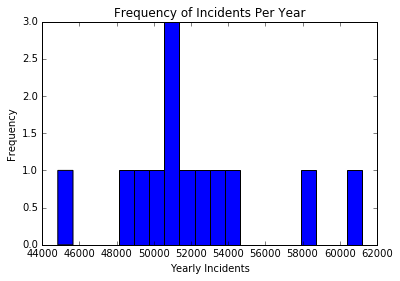

In [47]:
YearCount.Domestic.plot(kind='hist', bins=20, title='Frequency of Incidents Per Year')
plt.xlabel('Yearly Incidents')
plt.ylabel('Frequency')

### Step 11: Crosstab by day and Month - Describe --Note that "zeros" were automatically imputed to create data points for 31 days in each month.

In [48]:
DM = pd.crosstab(ts['Day'], ts['Month'], rownames=['Day'], margins=True)
DM

Month,1,2,3,4,5,6,7,8,9,10,11,12,All
Day,,,,,,,,,,,,,
1,3632,1853,2023,2262,2240,2440,2303,2249,2361,1997,1952,1784,27096
2,1677,1582,1781,1983,1998,2160,2025,2099,2090,1864,1722,1560,22541
3,1766,1612,1811,1854,1919,1999,2158,2059,1996,1700,1671,1521,22066
4,1666,1698,1843,1910,1999,1888,2691,2071,1911,1754,1703,1554,22688
5,1663,1680,1744,1819,2091,1868,2441,2124,1914,1746,1619,1474,22183
6,1704,1559,1775,1925,1982,1982,2092,2074,1973,1732,1629,1551,21978
7,1697,1649,1786,1885,2058,2059,2062,2032,1910,1679,1699,1532,22048
8,1680,1631,1743,1928,2036,2159,2178,1976,1928,1813,1707,1511,22290
9,1580,1628,1839,1823,2156,2171,2074,1966,1853,1798,1726,1453,22067


In [49]:
DM.describe()

Month,1,2,3,4,5,6,7,8,9,10,11,12,All
count,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000
mean,3285.625000,2984.875000,3613.437500,3671.562500,3970.062500,3988.187500,4061.625000,3810.937500,3498.687500,3352.250000,3116.500000,3091.562500,42445.312500
std,9000.611767,8183.453501,9890.927028,10056.205989,10867.123043,10923.531434,11118.438095,10431.685386,9583.105741,9176.080191,8535.873476,8463.174597,116197.061189
min,1454.000000,0.000000,1743.000000,0.000000,1919.000000,0.000000,1938.000000,1819.000000,0.000000,1607.000000,0.000000,1421.000000,12876.000000
25%,1578.000000,1624.000000,1809.000000,1907.750000,1993.250000,2055.750000,2004.250000,1911.250000,1773.250000,1677.750000,1616.500000,1520.250000,21921.000000
50%,1659.500000,1678.500000,1877.000000,1938.000000,2030.500000,2127.500000,2060.000000,1950.000000,1846.500000,1716.500000,1664.500000,1559.000000,22088.500000
75%,1684.250000,1740.500000,1925.500000,1994.500000,2121.750000,2189.250000,2145.250000,2038.750000,1925.000000,1780.000000,1704.000000,1643.750000,22303.000000
max,52570.000000,47758.000000,57815.000000,58745.000000,63521.000000,63811.000000,64986.000000,60975.000000,55979.000000,53636.000000,49864.000000,49465.000000,679125.000000


In [50]:
DM.sum()

Month
1       105140
2        95516
3       115630
4       117490
5       127042
6       127622
7       129972
8       121950
9       111958
10      107272
11       99728
12       98930
All    1358250
dtype: int64

In [51]:
ChicagoWeekCount = DayCount.groupby(pd.TimeGrouper(freq='W')).sum()

In [52]:
ChicagoWeekCount.head()

,Domestic,day_of_week,Month,Year,Day
Date,,,,,
2001-01-07,1234,1234,1234,1234,1234
2001-01-14,1043,1043,1043,1043,1043
2001-01-21,1055,1055,1055,1055,1055
2001-01-28,975,975,975,975,975
2001-02-04,1059,1059,1059,1059,1059


In [53]:
ChicagoWeekCount.describe()

,Domestic,day_of_week,Month,Year,Day
count,679.000000,679.000000,679.000000,679.000000,679.000000
mean,1000.184094,1000.184094,1000.184094,1000.184094,1000.184094
std,144.640955,144.640955,144.640955,144.640955,144.640955
min,194.000000,194.000000,194.000000,194.000000,194.000000
25%,901.500000,901.500000,901.500000,901.500000,901.500000
50%,992.000000,992.000000,992.000000,992.000000,992.000000
75%,1089.500000,1089.500000,1089.500000,1089.500000,1089.500000
max,1658.000000,1658.000000,1658.000000,1658.000000,1658.000000


In [54]:
ChicagoWeekCount.nlargest(10, 'Domestic')

,Domestic,day_of_week,Month,Year,Day
Date,,,,,
2002-06-02,1658,1658,1658,1658,1658
2002-07-07,1519,1519,1519,1519,1519
2001-06-17,1511,1511,1511,1511,1511
2002-06-16,1435,1435,1435,1435,1435
2002-06-23,1415,1415,1415,1415,1415
2002-07-21,1408,1408,1408,1408,1408
2002-06-30,1392,1392,1392,1392,1392
2001-05-06,1364,1364,1364,1364,1364
2002-05-19,1347,1347,1347,1347,1347
